In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import func_stat

In [2]:
dirCat=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\catalogs\forPaper\v05'
fileNameCat=r'05_COSMOS_SpectrZ_Zlim_1p2_AllBands_colors_ratios.csv'
idcolumn='Seq'
zspeccolumn='z_spec'
cat=pd.read_csv(os.path.join(dirCat,fileNameCat))

In [3]:
magsBroad=[c for c in cat.columns if 'magap3'  in c]
magsBroad=[m for m in magsBroad if m not in ['zpmagap3','Hwmagap3','Kswmagap3','yHmagap3']]
magsNarrow=[c for c in cat.columns if ('ap3' in c and 'mag' not in c)]
ratios=['B/IA484', 'B/IA527', 'V/IA484', 'V/IA527', 'V/IA624', 
        'r/IA527', 'r/IA624', 'r/IA679', 'r/IA738', 'r/NB711', 
        'ip/IA624', 'ip/IA679', 'ip/IA738', 'ip/IA767', 'ip/NB711',
        'ip/NB816', 'zpp/NB816']

In [4]:
catWork=cat[magsBroad+ratios+[zspeccolumn]]
catWork.columns

Index(['Ksmagap3', 'Ymagap3', 'Hmagap3', 'Jmagap3', 'Bmagap3', 'Vmagap3',
       'ipmagap3', 'rmagap3', 'umagap3', 'zppmagap3', 'B/IA484', 'B/IA527',
       'V/IA484', 'V/IA527', 'V/IA624', 'r/IA527', 'r/IA624', 'r/IA679',
       'r/IA738', 'r/NB711', 'ip/IA624', 'ip/IA679', 'ip/IA738', 'ip/IA767',
       'ip/NB711', 'ip/NB816', 'zpp/NB816', 'z_spec'],
      dtype='object')

In [5]:
len(catWork)

19176

In [6]:
X=catWork[magsBroad+ratios]
Y=catWork[zspeccolumn]
X_train=X[0:14000]
Y_train=Y[0:14000]
X_test=X[14000:]
Y_test=Y[14000:]

In [7]:
### Create resid column ###
def residCol(df,colSpectrZ, colPhotoZ,colResid):
    df[colResid]=(df[colSpectrZ]-df[colPhotoZ])/(df[colSpectrZ]+1)
    return df

In [13]:
regr = RandomForestRegressor(random_state=0,n_estimators=300)
regr.fit(X_train, Y_train)
df=pd.DataFrame(columns=[zspeccolumn,'photoZ'])
df[zspeccolumn]=Y_test
df['photoZ']=regr.predict(X_test)
df=residCol(df,colSpectrZ=zspeccolumn, colPhotoZ='photoZ',colResid='resid')
func_stat.statResid(df,colResid='resid')

{'Num objects': 5176,
 'Std': 0.06,
 'NMAD': 0.016,
 'Mean': -0.0041,
 '% outl_15': 2.61}

In [14]:
X=catWork[ratios]
Y=catWork[zspeccolumn]
X_train=X[0:14000]
Y_train=Y[0:14000]
X_test=X[14000:]
Y_test=Y[14000:]

regr = RandomForestRegressor(random_state=0,n_estimators=300)
regr.fit(X_train, Y_train)
df=pd.DataFrame(columns=[zspeccolumn,'photoZ'])
df[zspeccolumn]=Y_test
df['photoZ']=regr.predict(X_test)
df=residCol(df,colSpectrZ=zspeccolumn, colPhotoZ='photoZ',colResid='resid')
func_stat.statResid(df,colResid='resid')

{'Num objects': 5176,
 'Std': 0.06,
 'NMAD': 0.016,
 'Mean': -0.004,
 '% outl_15': 2.61}

In [16]:
X=catWork[magsBroad]
Y=catWork[zspeccolumn]
X_train=X[0:14000]
Y_train=Y[0:14000]
X_test=X[14000:]
Y_test=Y[14000:]

regr = RandomForestRegressor(random_state=0,n_estimators=300)
regr.fit(X_train, Y_train)
df=pd.DataFrame(columns=[zspeccolumn,'photoZ'])
df[zspeccolumn]=Y_test
df['photoZ']=regr.predict(X_test)
df=residCol(df,colSpectrZ=zspeccolumn, colPhotoZ='photoZ',colResid='resid')
func_stat.statResid(df,colResid='resid')

{'Num objects': 5176,
 'Std': 0.061,
 'NMAD': 0.027,
 'Mean': -0.0045,
 '% outl_15': 2.53}

In [17]:
X=catWork[ratios]
Y=catWork[zspeccolumn]
X_train=X[0:14000]
Y_train=Y[0:14000]
X_test=X[14000:]
Y_test=Y[14000:]

regr = RandomForestRegressor(random_state=0,n_estimators=3000)
regr.fit(X_train, Y_train)
df=pd.DataFrame(columns=[zspeccolumn,'photoZ'])
df[zspeccolumn]=Y_test
df['photoZ']=regr.predict(X_test)
df=residCol(df,colSpectrZ=zspeccolumn, colPhotoZ='photoZ',colResid='resid')
func_stat.statResid(df,colResid='resid')

{'Num objects': 5176,
 'Std': 0.06,
 'NMAD': 0.015,
 'Mean': -0.0041,
 '% outl_15': 2.57}

In [18]:
X=catWork[magsBroad+ratios]
Y=catWork[zspeccolumn]
X_train=X[0:14000]
Y_train=Y[0:14000]
X_test=X[14000:]
Y_test=Y[14000:]

regr = RandomForestRegressor(random_state=0,n_estimators=3000)
regr.fit(X_train, Y_train)
df=pd.DataFrame(columns=[zspeccolumn,'photoZ'])
df[zspeccolumn]=Y_test
df['photoZ']=regr.predict(X_test)
df=residCol(df,colSpectrZ=zspeccolumn, colPhotoZ='photoZ',colResid='resid')
func_stat.statResid(df,colResid='resid')

{'Num objects': 5176,
 'Std': 0.059,
 'NMAD': 0.015,
 'Mean': -0.004,
 '% outl_15': 2.61}

In [23]:
X=catWork[ratios]
Y=catWork[zspeccolumn]
X_train=X[0:14000]
Y_train=Y[0:14000]
X_test=X[14000:]
Y_test=Y[14000:]

regr = RandomForestRegressor(random_state=0,n_estimators=10000,criterion='mse',n_jobs=-1,verbose=1)
regr.fit(X_train, Y_train)
df=pd.DataFrame(columns=[zspeccolumn,'photoZ'])
df[zspeccolumn]=Y_test
df['photoZ']=regr.predict(X_test)
df=residCol(df,colSpectrZ=zspeccolumn, colPhotoZ='photoZ',colResid='resid')
func_stat.statResid(df,colResid='resid')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10000 out of 

{'Num objects': 5176,
 'Std': 0.06,
 'NMAD': 0.016,
 'Mean': -0.0041,
 '% outl_15': 2.59}

In [8]:
X=catWork[ratios]
Y=catWork[zspeccolumn]
X_train=X[0:14000]
Y_train=Y[0:14000]
X_test=X[14000:]
Y_test=Y[14000:]

regr = RandomForestRegressor(random_state=0,n_estimators=20000,criterion='mse',n_jobs=-1,verbose=1)
regr.fit(X_train, Y_train)
df=pd.DataFrame(columns=[zspeccolumn,'photoZ'])
df[zspeccolumn]=Y_test
df['photoZ']=regr.predict(X_test)
df=residCol(df,colSpectrZ=zspeccolumn, colPhotoZ='photoZ',colResid='resid')
func_stat.statResid(df,colResid='resid')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 11234 tasks  

{'Num objects': 5176,
 'Std': 0.06,
 'NMAD': 0.016,
 'Mean': -0.0041,
 '% outl_15': 2.57}

In [26]:
import numpy as np

(array([  46.,   48.,   66.,  216.,  556., 1226., 2567., 4407., 5770.,
        4274.]),
 array([-1.68848865, -1.51172528, -1.33496191, -1.15819854, -0.98143517,
        -0.8046718 , -0.62790843, -0.45114506, -0.27438169, -0.09761832,
         0.07914505]),
 <a list of 10 Patch objects>)

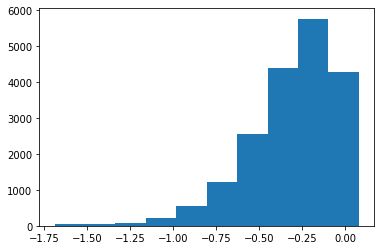

In [36]:
plt.hist(np.log10(catWork[zspeccolumn]))